<a href="https://colab.research.google.com/github/1101madan/Association_Rules/blob/main/12_Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Prepration

In [8]:
heart_df_orig = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Files/heart_disease.xlsx',sheet_name=1)

In [9]:
heart_df_orig.head()

age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0

In [10]:
# Getting to know the data:
heart_df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [11]:
heart_df_orig['fbs'] =heart_df_orig['fbs'].astype('object')

In [12]:
heart_df_orig.describe()

age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000

In [13]:
heart_df_orig.duplicated().sum()

1

###### Summary
* 908 Rows, 13 columns
* There are null values in oldpeak column
* 1 Row is Duplicated
* 2 Columns with Boolean Values (one of which is stored as object)
* num Column is Response variable(Stages of heart disease, 0 if no heart disease); changing it to 0 or 1 for better model

In [14]:
heart_df_orig['num'] = np.where(heart_df_orig['num'] > 0, 1, heart_df_orig['num'])
heart_df_orig['num'].value_counts()

num
1    509
0    399
Name: count, dtype: int64

### Dropping Null Values

In [15]:
heart_df_orig.dropna(axis=0,inplace=True)

In [16]:
heart_df_orig.info()

<class 'pandas.core.frame.DataFrame'>
Index: 846 entries, 0 to 905
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       846 non-null    int64  
 1   sex       846 non-null    object 
 2   cp        846 non-null    object 
 3   trestbps  846 non-null    int64  
 4   chol      846 non-null    int64  
 5   fbs       846 non-null    object 
 6   restecg   846 non-null    object 
 7   thalch    846 non-null    int64  
 8   exang     846 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     846 non-null    object 
 11  thal      846 non-null    object 
 12  num       846 non-null    int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 92.5+ KB


### Dropping Duplicated Rows

In [17]:
heart_df_orig.drop_duplicates(inplace=True)

In [18]:
heart_df_orig.duplicated().sum()

0

### Fixing dtypes

In [19]:
heart_df_orig.fbs.value_counts()

fbs
False    687
True     158
Name: count, dtype: int64

In [20]:
heart_df_orig.exang.value_counts()

exang
False    512
True     332
FALSE      1
Name: count, dtype: int64

In [21]:
# Dropping the row where the Value - 'FALSE'

heart_df_orig = heart_df_orig.drop(heart_df_orig[heart_df_orig['exang'] == 'FALSE'].index,axis=0)


In [22]:
heart_df_orig.exang.value_counts()


exang
False    512
True     332
Name: count, dtype: int64

In [23]:
heart_df = heart_df_orig.copy()

In [24]:
heart_df.num.value_counts()

num
1    467
0    377
Name: count, dtype: int64

# EDA

In [25]:
heart_df

age   sex               cp  trestbps  chol    fbs           restecg  \
0     63  Male   typical angina       145   233   True    lv hypertrophy   
1     41  Male  atypical angina       135   203  False            normal   
2     57  Male     asymptomatic       140   192  False            normal   
3     52  Male   typical angina       118   186  False    lv hypertrophy   
4     57  Male     asymptomatic       110   201  False            normal   
..   ...   ...              ...       ...   ...    ...               ...   
901   51  Male     asymptomatic       110     0   True            normal   
902   62  Male     asymptomatic       160   254   True  st-t abnormality   
903   53  Male     asymptomatic       125     0  False            normal   
904   62  Male     asymptomatic       166   170  False  st-t abnormality   
905   56  Male      non-anginal       170     0  False    lv hypertrophy   

     thalch  exang  oldpeak        slope               thal  num  
0       150  False      2.3  downsloping       fixed defect    0  
1       132  False      0.0         flat       fixed defect    0  
2       148  False      0.4         flat       fixed defect    0  
3       190  False      0.0         flat       fixed defect    0  
4       126   True      1.5         flat       fixed defect    0  
..      ...    ...      ...          ...                ...  ...  
901      92  False      0.0         flat       fixed defect    1  
902     108   True      3.0         flat             normal    1  
903     120  False      1.5    upsloping  reversable defect    1  
904     120   True      3.0         flat  reversable defect    1  
905     123   True      2.5  downsloping             normal    1  

[844 rows x 13 columns]

#### HISTOGRAMS

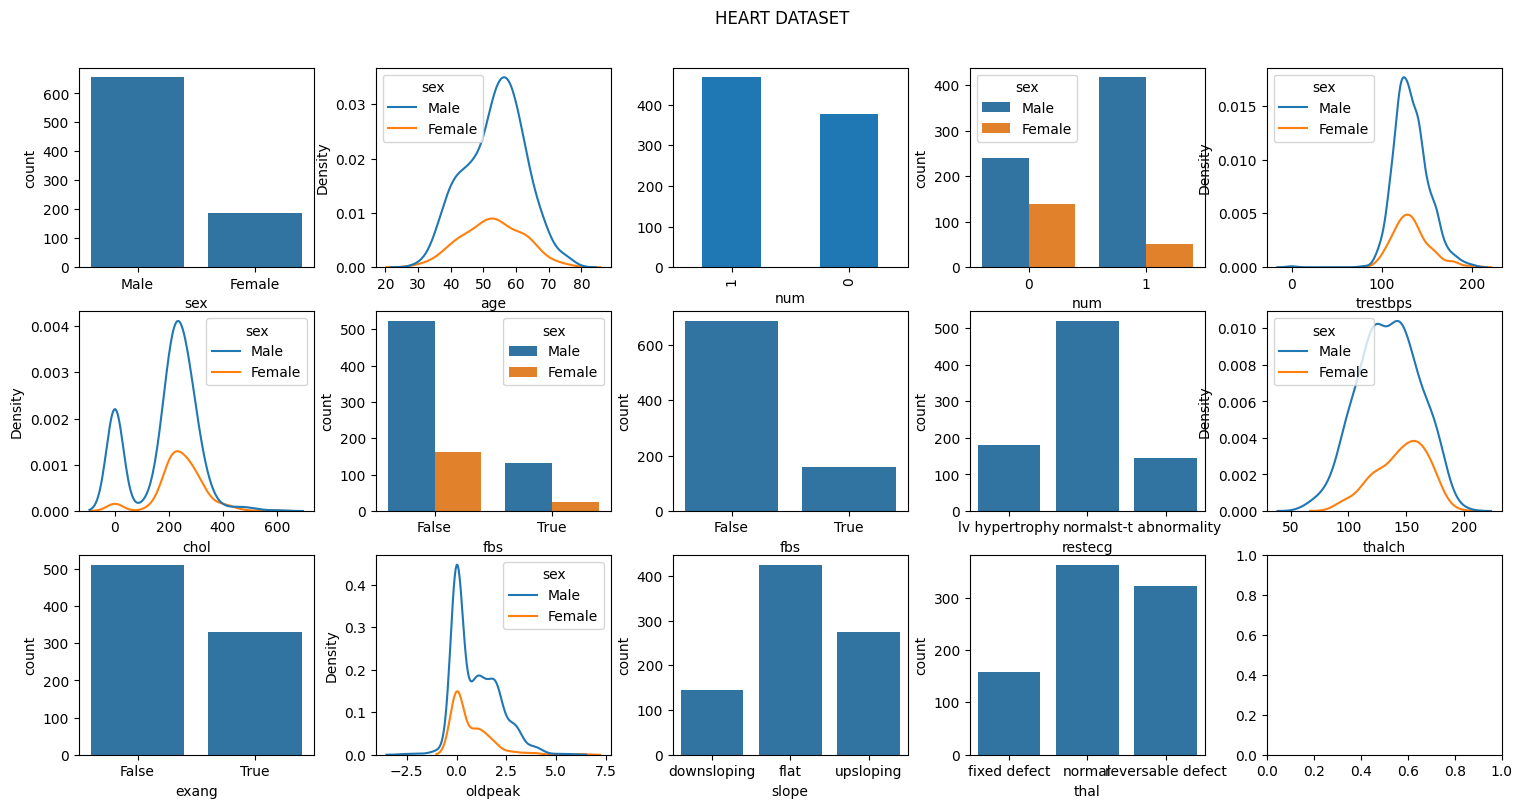

In [26]:
fig,axe = plt.subplots(3,5, figsize=(15,8))
plt.suptitle('HEART DATASET\n')
plt.tight_layout()
sns.countplot(data = heart_df, x='sex',ax=axe[0,0])
sns.kdeplot(data = heart_df,x='age',hue='sex',ax=axe[0,1]).set_xticks(np.arange(20, 90, 10))
heart_df['num'].value_counts().plot(kind='bar',ax=axe[0,2])
sns.countplot(data=heart_df,x='num',hue='sex',ax=axe[0,3])
sns.kdeplot(data=heart_df,x='trestbps',hue='sex',ax=axe[0,4])
sns.kdeplot(data=heart_df,x='chol',hue='sex',ax=axe[1,0])
sns.countplot(data=heart_df,x='fbs',ax=axe[1,1],hue='sex')
sns.countplot(data=heart_df,x='fbs',ax=axe[1,2])
sns.countplot(data=heart_df,x='restecg',ax=axe[1,3])
sns.kdeplot(data=heart_df,x='thalch',hue='sex',ax=axe[1,4])
sns.countplot(data=heart_df,x='exang',ax=axe[2,0])
sns.kdeplot(data=heart_df,x='oldpeak',hue='sex',ax=axe[2,1])
sns.countplot(data=heart_df,x='slope',ax=axe[2,2])
sns.countplot(data=heart_df,x='thal',ax=axe[2,3])

plt.show()

In [27]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844 entries, 0 to 905
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       844 non-null    int64  
 1   sex       844 non-null    object 
 2   cp        844 non-null    object 
 3   trestbps  844 non-null    int64  
 4   chol      844 non-null    int64  
 5   fbs       844 non-null    object 
 6   restecg   844 non-null    object 
 7   thalch    844 non-null    int64  
 8   exang     844 non-null    object 
 9   oldpeak   844 non-null    float64
 10  slope     844 non-null    object 
 11  thal      844 non-null    object 
 12  num       844 non-null    int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 92.3+ KB


In [28]:
heart_df.nunique()

age          49
sex           2
cp            4
trestbps     63
chol        219
fbs           2
restecg       3
thalch      118
exang         2
oldpeak      53
slope         3
thal          3
num           2
dtype: int64


#### Boxplots

<Axes: xlabel='oldpeak'>

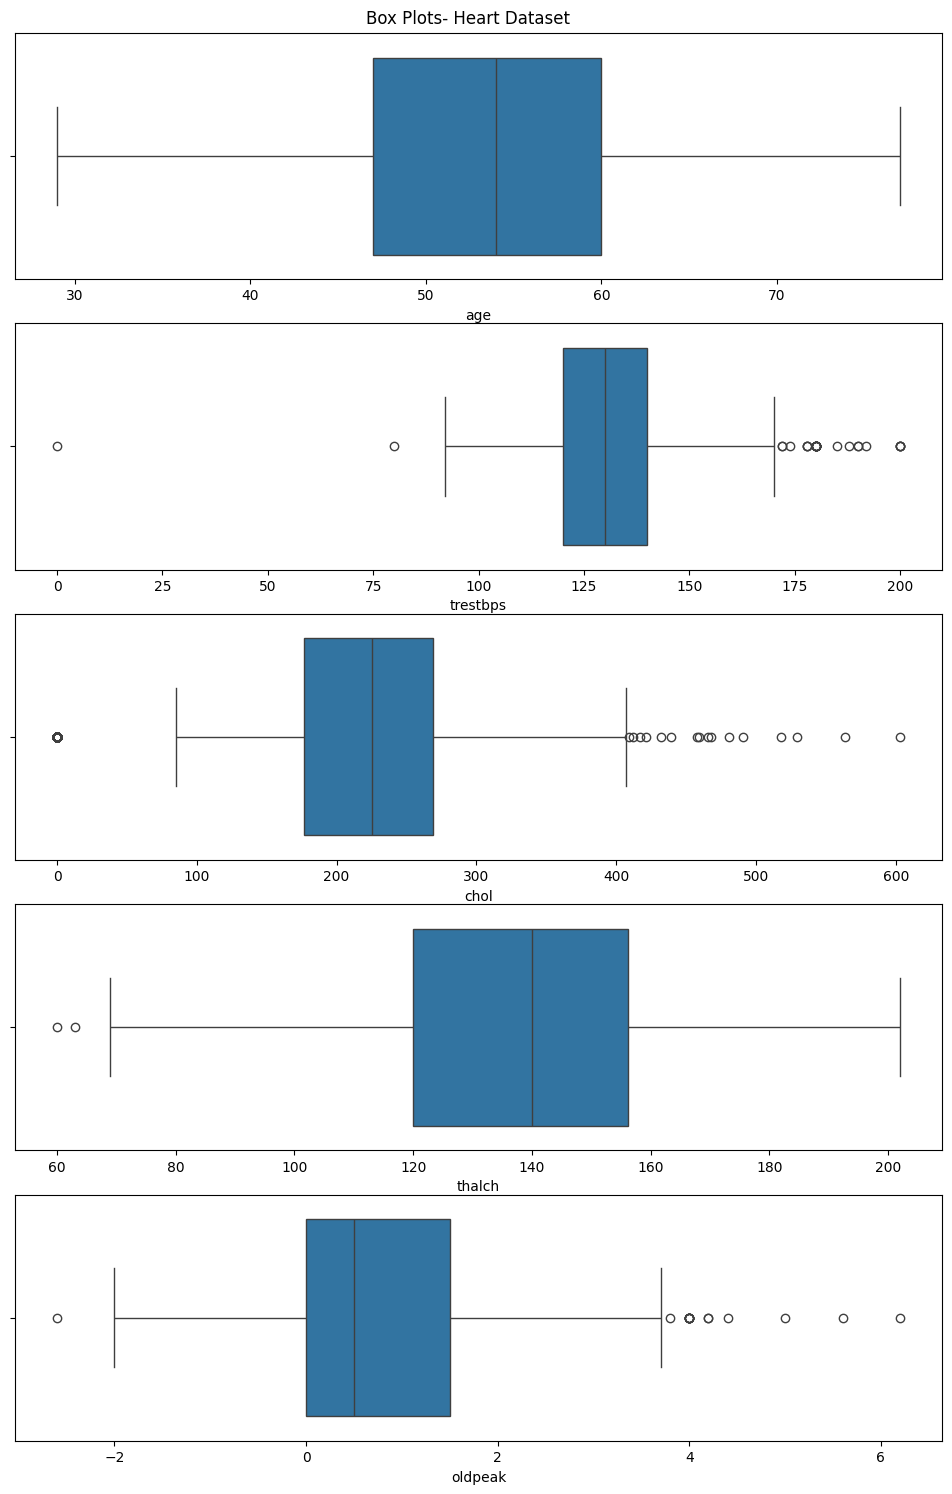

In [29]:
fig,axe2 = plt.subplots(5,1,figsize=(10,15))
plt.suptitle('Box Plots- Heart Dataset')
plt.tight_layout()
sns.boxplot(data=heart_df,x='age',ax=axe2[0])
sns.boxplot(data=heart_df,x='trestbps',ax=axe2[1])
sns.boxplot(data=heart_df,x='chol',ax=axe2[2])
sns.boxplot(data=heart_df,x='thalch',ax=axe2[3])
sns.boxplot(data=heart_df,x='oldpeak',ax=axe2[4])

#### Correlation Heatmap

<Axes: title={'center': 'Correlation matrix - Heatmap'}>

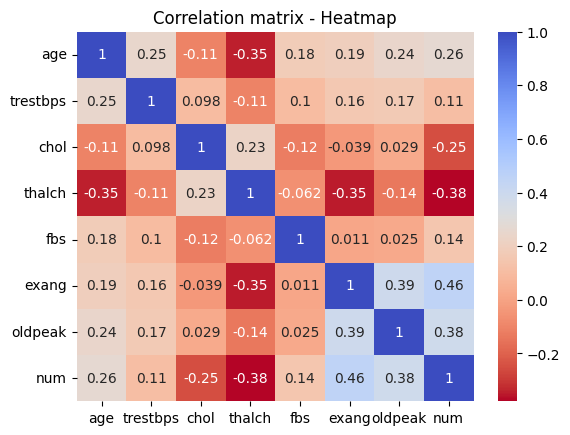

In [30]:
cols = ['age','trestbps','chol','thalch','fbs','exang','oldpeak','num']
subset = heart_df[cols]
plt.title('Correlation matrix - Heatmap')
sns.heatmap(subset.corr(),annot=True,cmap='coolwarm_r')

* Age is highly negatively correlated with maximum heart rate acheived(thalch).
* ST Depression and exercise linked Angina has highest Positive Correlation with stages of heart disease
* Maximum heart rate achieved (thalch) followed by cholesterol has lowest negative correlation with Stages of heart disease(num)
* Maximum heart rate achieved (thalch) is also highly correlated negatively with exercise induced angina (exang)
* ST Depression induced by exercise(oldpeak) is highly correlated with exercise induced angina (exang)

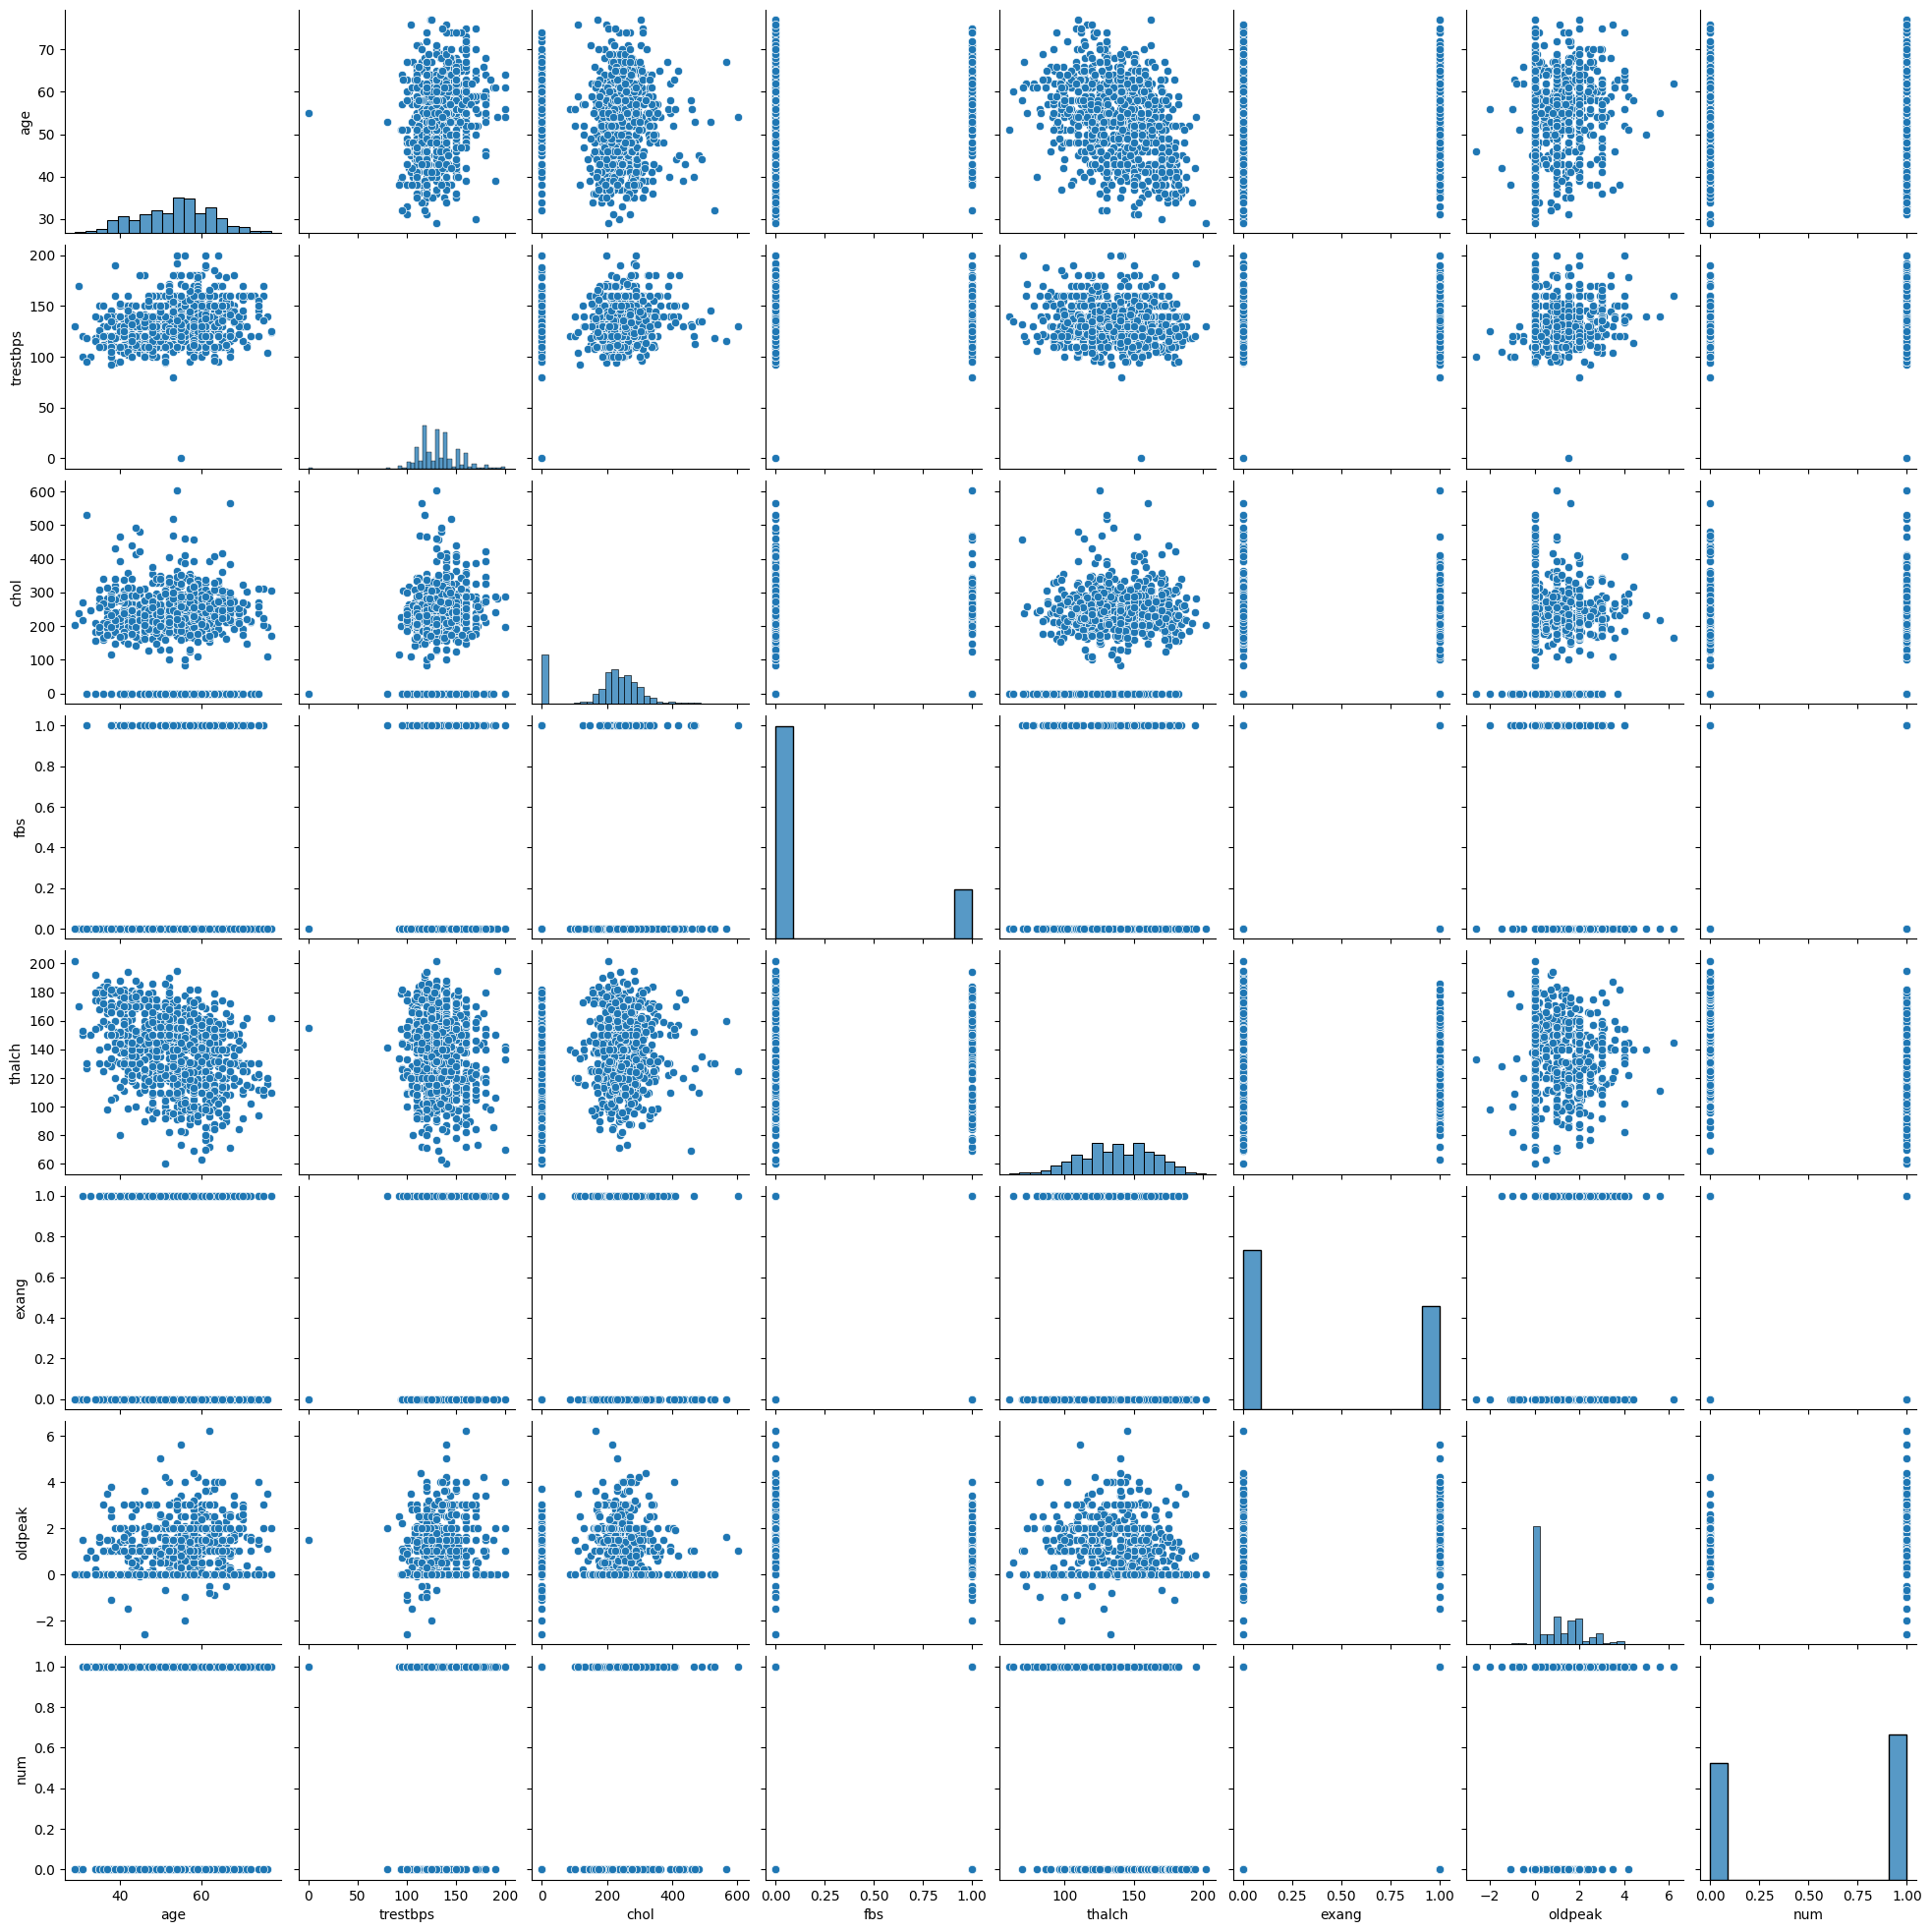

In [31]:
sns.pairplot(heart_df)

# Preprocessing the dataset

In [32]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Scaling the Numerical Features:

In [33]:
scaler = StandardScaler()

In [34]:
num_fet = ['trestbps','chol','thalch','oldpeak']

In [36]:
heart_df[num_fet] = scaler.fit_transform(heart_df[num_fet])
heart_df.head()

age   sex               cp  trestbps      chol    fbs         restecg  \
0   63  Male   typical angina  0.658540  0.273077   True  lv hypertrophy   
1   41  Male  atypical angina  0.137046  0.004404  False          normal   
2   57  Male     asymptomatic  0.397793 -0.094110  False          normal   
3   52  Male   typical angina -0.749492 -0.147845  False  lv hypertrophy   
4   57  Male     asymptomatic -1.166687 -0.013508  False          normal   

     thalch  exang   oldpeak        slope          thal  num  
0  0.499578  False  1.288614  downsloping  fixed defect    0  
1 -0.203227  False -0.814865         flat  fixed defect    0  
2  0.421489  False -0.449043         flat  fixed defect    0  
3  2.061367  False -0.814865         flat  fixed defect    0  
4 -0.437495   True  0.556969         flat  fixed defect    0

#### Encoding Categorical Columns

In [37]:
heart_df_encoded = heart_df.copy()

In [38]:
# int - label encoder
label_encoder = preprocessing.LabelEncoder()

In [39]:
heart_df_encoded.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [40]:
heart_df_encoded.nunique()

age          49
sex           2
cp            4
trestbps     63
chol        219
fbs           2
restecg       3
thalch      118
exang         2
oldpeak      53
slope         3
thal          3
num           2
dtype: int64

In [41]:
heart_df_encoded['sex']= label_encoder.fit_transform(heart_df_encoded['sex'])
heart_df_encoded['cp']= label_encoder.fit_transform(heart_df_encoded['cp'])
heart_df_encoded['fbs']= label_encoder.fit_transform(heart_df_encoded['fbs'])
heart_df_encoded['restecg']= label_encoder.fit_transform(heart_df_encoded['restecg'])
heart_df_encoded['exang']= label_encoder.fit_transform(heart_df_encoded['exang'])
heart_df_encoded['slope']= label_encoder.fit_transform(heart_df_encoded['slope'])
heart_df_encoded['thal']= label_encoder.fit_transform(heart_df_encoded['thal'])

In [42]:
heart_df_encoded.head()

age  sex  cp  trestbps      chol  fbs  restecg    thalch  exang   oldpeak  \
0   63    1   3  0.658540  0.273077    1        0  0.499578      0  1.288614   
1   41    1   1  0.137046  0.004404    0        1 -0.203227      0 -0.814865   
2   57    1   0  0.397793 -0.094110    0        1  0.421489      0 -0.449043   
3   52    1   3 -0.749492 -0.147845    0        0  2.061367      0 -0.814865   
4   57    1   0 -1.166687 -0.013508    0        1 -0.437495      1  0.556969   

   slope  thal  num  
0      0     0    0  
1      1     0    0  
2      1     0    0  
3      1     0    0  
4      1     0    0

In [43]:
target_y = heart_df_encoded['num']

In [44]:
target_y

0      0
1      0
2      0
3      0
4      0
      ..
901    1
902    1
903    1
904    1
905    1
Name: num, Length: 844, dtype: int64

In [45]:
inde_x = heart_df_encoded.iloc[:, 0:10]

In [46]:
inde_x

age  sex  cp  trestbps      chol  fbs  restecg    thalch  exang   oldpeak
0     63    1   3  0.658540  0.273077    1        0  0.499578      0  1.288614
1     41    1   1  0.137046  0.004404    0        1 -0.203227      0 -0.814865
2     57    1   0  0.397793 -0.094110    0        1  0.421489      0 -0.449043
3     52    1   3 -0.749492 -0.147845    0        0  2.061367      0 -0.814865
4     57    1   0 -1.166687 -0.013508    0        1 -0.437495      1  0.556969
..   ...  ...  ..       ...       ...  ...      ...       ...    ...       ...
901   51    1   0 -1.166687 -1.813618    1        1 -1.765016      0 -0.814865
902   62    1   0  1.440780  0.461148    1        2 -1.140300      1  1.928803
903   53    1   0 -0.384447 -1.813618    0        1 -0.671764      0  0.556969
904   62    1   0  1.753676 -0.291137    0        2 -0.671764      1  1.928803
905   56    1   2  1.962273 -1.813618    0        0 -0.554629      1  1.471525

[844 rows x 10 columns]

In [47]:
heart_df_encoded.num.value_counts()

num
1    467
0    377
Name: count, dtype: int64

In [48]:
# Splitting the dataset into test and train:
x_train,x_test,y_train,y_test = train_test_split(inde_x,target_y,test_size=0.25,random_state=99)

In [49]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(633, 10) (211, 10) (633,) (211,)


# Model Building

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix , roc_curve, auc

In [51]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [52]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [53]:
plt.figure(figsize=(25,8),dpi=1000)
tree.plot_tree(model,
               feature_names=inde_x.columns,
               class_names=heart_df_encoded.num.value_counts().index.astype('str'),
               fontsize=10,filled=True, rounded=True)
plt.show()

In [54]:
pred = model.predict(x_test)
pd.Series(pred).value_counts()

1    118
0     93
Name: count, dtype: int64

In [55]:
pd.crosstab(y_test,pred)

col_0   0   1
num          
0      71  24
1      22  94

In [56]:
confusion_matrix(y_test,pred)

array([[71, 24],
       [22, 94]])

In [57]:
np.mean(pred==y_test)

0.7819905213270142

In [58]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76        95
           1       0.80      0.81      0.80       116

    accuracy                           0.78       211
   macro avg       0.78      0.78      0.78       211
weighted avg       0.78      0.78      0.78       211



In [59]:
fpr, tpr, thresholds = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)

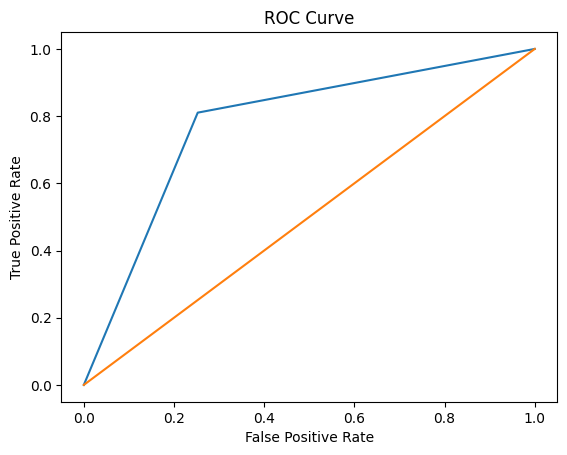

In [60]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1])

## Decision Tree - Gini Criteria


In [61]:
model_gini = DecisionTreeClassifier(criterion='gini',max_depth=5)

In [62]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [63]:
pred_gini = model.predict(x_test)


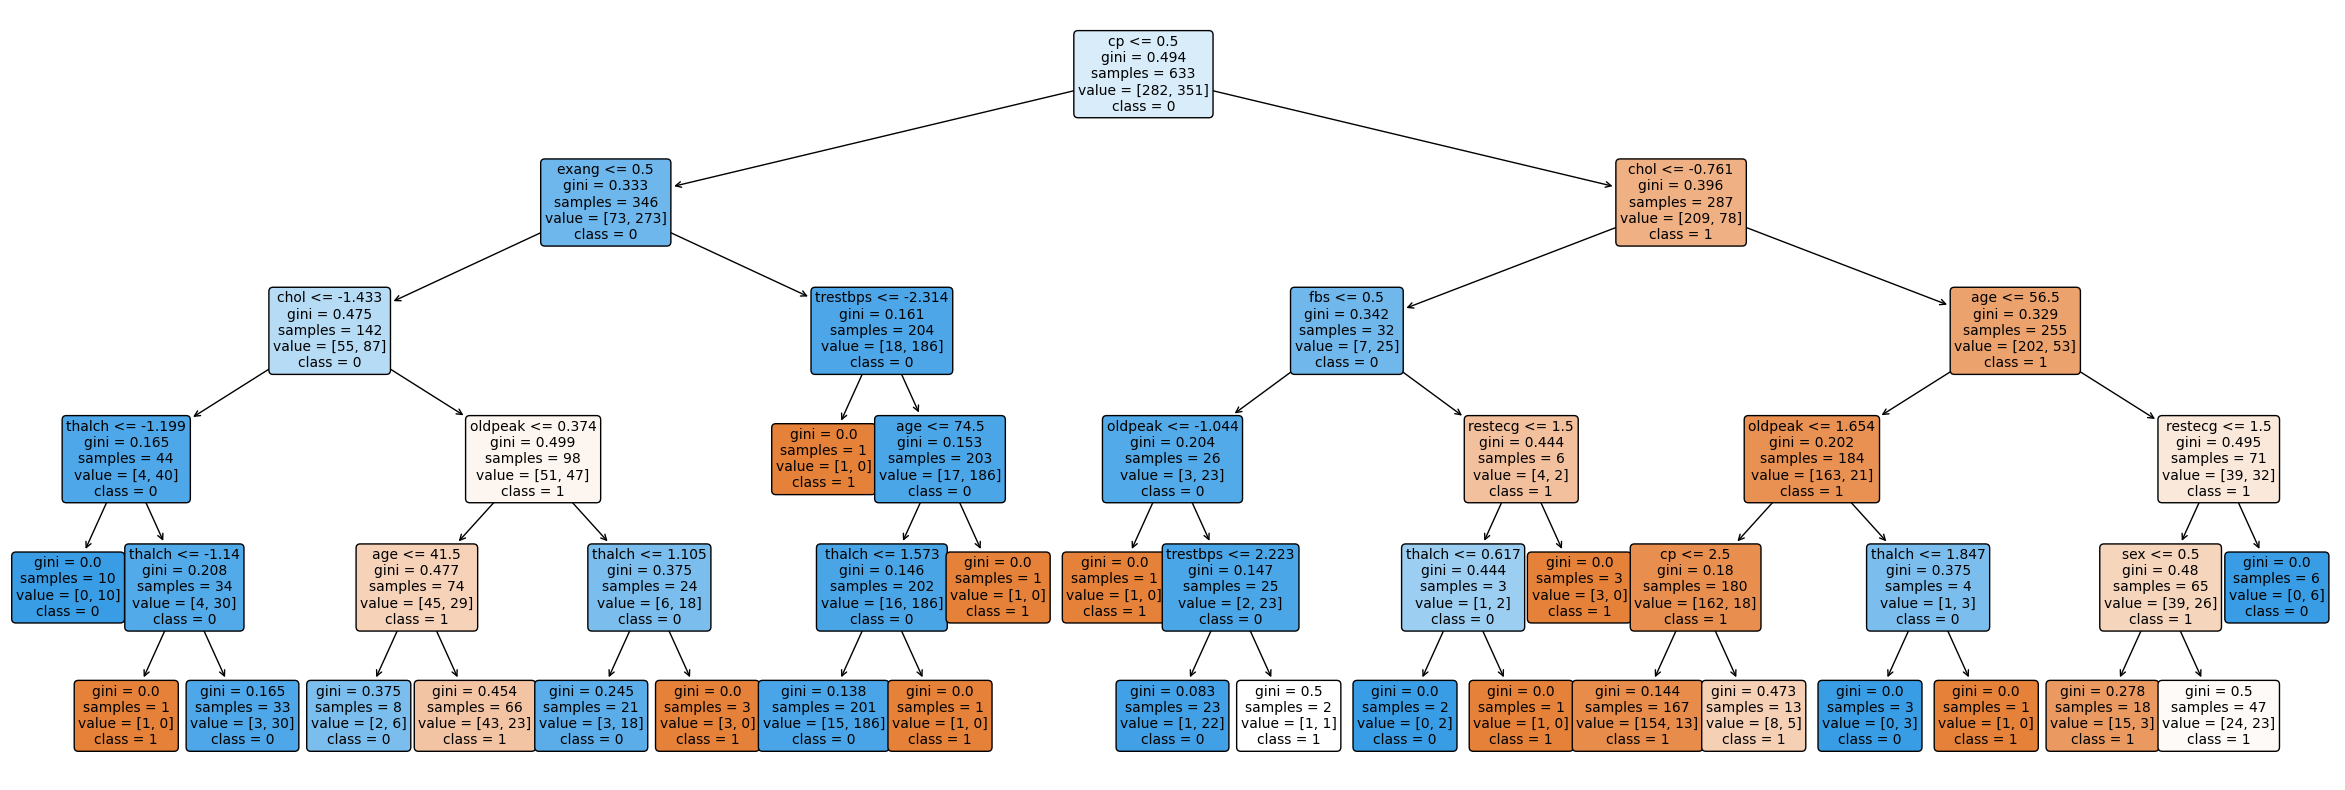

In [64]:
plt.figure(figsize=(30,10))
tree.plot_tree(model_gini,
               feature_names=inde_x.columns,
               class_names=heart_df_encoded.num.value_counts().index.astype('str'),
               fontsize=10,filled=True, rounded=True)
plt.show()

In [65]:
np.mean(pred_gini==y_test)

0.7819905213270142

In [66]:
print(classification_report(y_test,pred_gini))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76        95
           1       0.80      0.81      0.80       116

    accuracy                           0.78       211
   macro avg       0.78      0.78      0.78       211
weighted avg       0.78      0.78      0.78       211



In [67]:
fpr, tpr, thresholds = roc_curve(y_test,pred_gini)
roc_auc = auc(fpr,tpr)

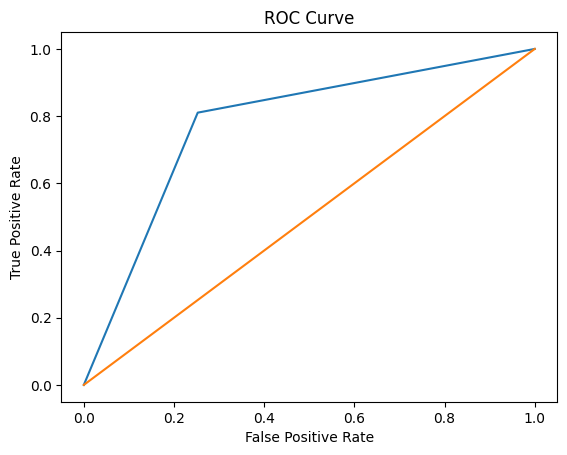

In [68]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1])

# Comments

* The model accuray of 79.6% at max_dept of 2 but this may cause underfitting; on further parameter tuning max_depth of 5 was set as it has the Accuracy of 79 % which seems as optimal tree depth for the model.
* Both Entropy and Gini Index have same accuracy of 79% at max_depth of 5

Hyperparameters of the decision tree models:

Decision tree is a Supervised machine learning model which uses 2 parameters - criterion and max_depth.
It has nodes and leaves. Nodes are the point where the decisions are made and leaves are the outcome of these decisions, it splits to create a homogeneous outcomes.

1. **criterion:** it Accepts -- gini or entropy;
    * Both gini and entropy is used to measure the disorder in the dataset.0 entropy or gini Indicates the node is homogeneous
    * Gini Index:
        * Formula :  1- ∑ p^2
    * Entropy :
        * Formula: -∑p.log2.p
2. **max_depth:**
   * This parameter limits the number of nodes for the decision tree.
   * Higer max_depth values lead to overfitting of the model to the data.
   * Lower max_depth values may lead to underfitting to the model.

* **Label Encoding** :
    * It assigns a Unique numerical value corresponding to a category before using the data for training the machine learning models.
* **One Hot encoding**:
    * One hot encoding transforms the categorical features to individual column for each categoriy with binary values.